# Курсова робота

Інформація про набір даних:<br>
Два набори даних пов'язані з червоним і білим варіантами португальського вина "Vinho Verde". Через проблеми конфіденційності та логістики доступні лише фізико-хімічні (вхідні) та сенсорні (вихідні) змінні (наприклад, немає даних про типи винограду, бренд вина, ціну продажу вина тощо).

Завдання:<br>
Використовуючи різні моделі задач класифікації та регресії вибрати ту, яка (на вашу думку) буде найкраще робити передбачення.<br>
Детальніше:<br>
1. Провести аналіз атрибутів (змінних), визначити їх тип (дискретний чи неперервний).
2. Првоести попередню обробку даних (візуалізувати дані, позбутися пропущених значень, нормувати чи логарифмувати дані, тощо).
3. Дослідити зв'язки між змінними.
4. Використовувати крос-валідацію для навчання та оцінки моделі.
5. Вибрати що найменше 5 класифікаційних (регресійних) моделей, серед яких врешті знайти найточнішу.
6. Вітаються будь-які інші кроки, що сприяють покращенню якості моделі.

# Імпортуємо необхідні бібліотеки і дата-фрейми

In [202]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score

pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')


In [203]:
redwine = pd.read_csv(
    'winequality-red.csv',
    sep = ';',
    header = 0
)

In [204]:
whitewine = pd.read_csv(
    'winequality-white.csv',
    sep = ';',
    header = 0
)

### Об'єднаємо датафрейми для червоного та білого вина

In [205]:
redwine['wine type'] = 0
whitewine['wine type'] = 1

In [206]:
wine = pd.concat(
    [redwine, whitewine],
    axis = 0
)

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### Визначимо тип змінних (категорні чи неперервні)

Для цього визначимо кількість унікальних значень для кожного атрибута.

In [207]:
winecols = []
for col in wine.columns:
    winecols.append(col)
winecols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'wine type']

In [208]:
runiqueCount = [(wine[winecols[i]]).nunique() for i in range(len(winecols))]  

In [209]:
wineparaminspect = pd.DataFrame(
    data={
        'x Params': winecols,
        'unique count': runiqueCount,
    }
)

In [210]:
wineparaminspect['status'] = np.where(wineparaminspect['unique count'] > 10, 'numerical', 'categorical')
wineparaminspect

,x Params,unique count,status
0,fixed acidity,106,numerical
1,volatile acidity,187,numerical
2,citric acid,89,numerical
3,residual sugar,316,numerical
4,chlorides,214,numerical
5,free sulfur dioxide,135,numerical
6,total sulfur dioxide,276,numerical
7,density,998,numerical
8,pH,108,numerical
9,sulphates,111,numerical


<p style="background-color:#CFF4F3;">Вважатимемо категорними дані, що мають не більш ніж 10 унікальних значень. В такому випадку до таких даних віднесемо лише якість вина. Усі інші параметри вважатимемо неперервними.</p>

### Перевіримо інформацію щодо дата-фрейма, тим самим перевіривши його на наявність пропущених даних.

In [211]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<p style="background-color:#CFF4F3;">Як бачимо, пропущених та текстових значень немає.</p>

### Перевіримо які параметри пов'язані з залежною змінною

### Знайдемо коефіцієнти кореляції для параметрів з залежною змінною

In [212]:
wineparamsx = winecols[:-2:]

In [213]:
def corrcolumn(x, y):
    z = np.corrcoef(x, y)
    return z[0][1]

In [214]:
i = 0
winecorrlist = []
while i < len(wineparamsx):
    winecorrlist.append(corrcolumn(wine[wineparamsx[i]], wine['quality']))
    i+=1

In [215]:
corr = pd.DataFrame(
    data = {
        'x Params': wineparamsx,
        'coef corr': winecorrlist
    }
)

In [216]:
corr['corr estimate'] = np.where(abs(corr['coef corr']) > 0.1, 'strong', 'weak')
corr

,x Params,coef corr,corr estimate
0,fixed acidity,-0.076743,weak
1,volatile acidity,-0.265699,strong
2,citric acid,0.085532,weak
3,residual sugar,-0.036980,weak
4,chlorides,-0.200666,strong
5,free sulfur dioxide,0.055463,weak
6,total sulfur dioxide,-0.041385,weak
7,density,-0.305858,strong
8,pH,0.019506,weak
9,sulphates,0.038485,weak


<div style="background-color:#CFF4F3;">Нехай якщо значення кореляції менші за 0.1, вважатимемо таку кореляцію слабкою, більшу за 0.1 - сильною.

Таким чином отримаємо 4 параметри з показовою кореляцією:
- volatile acidity
- chlorides
- density
- alcohol
    
Для аналізу візьмемо усі дані, крім:
- residual sugar
- free sulfur dioxide
- total sulfur dioxide
</div>

### Візуалізуємо дані:

Побудуємо графіки залежності кожного параметру від залежної змінної (quality).

In [217]:
y = wine['quality']                                         

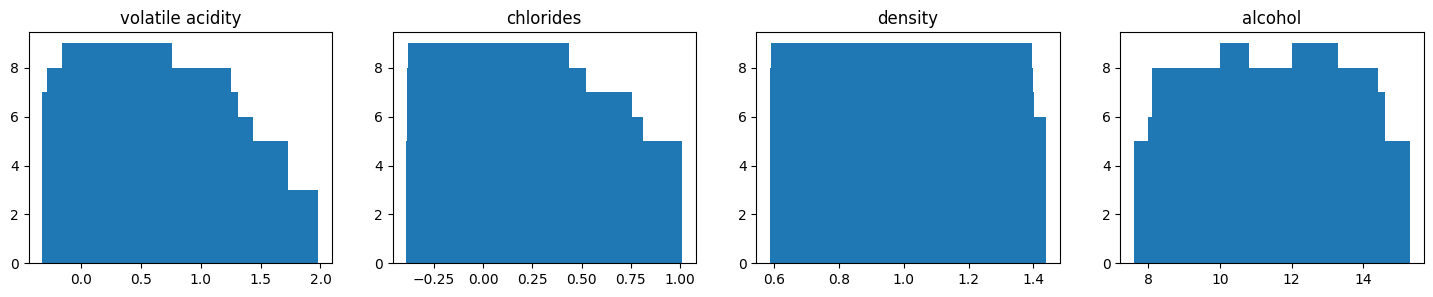

In [84]:
plt.figure(figsize=(18, 3))

plt.subplot(141)
plt.bar(wine['volatile acidity'], y)
plt.title('volatile acidity')

plt.subplot(142)
plt.bar(wine['chlorides'], y)
plt.title('chlorides')

plt.subplot(143)
plt.bar(wine['density'], y)
plt.title('density')

plt.subplot(144)
plt.bar(wine['alcohol'], y)
plt.title('alcohol')

plt.show()

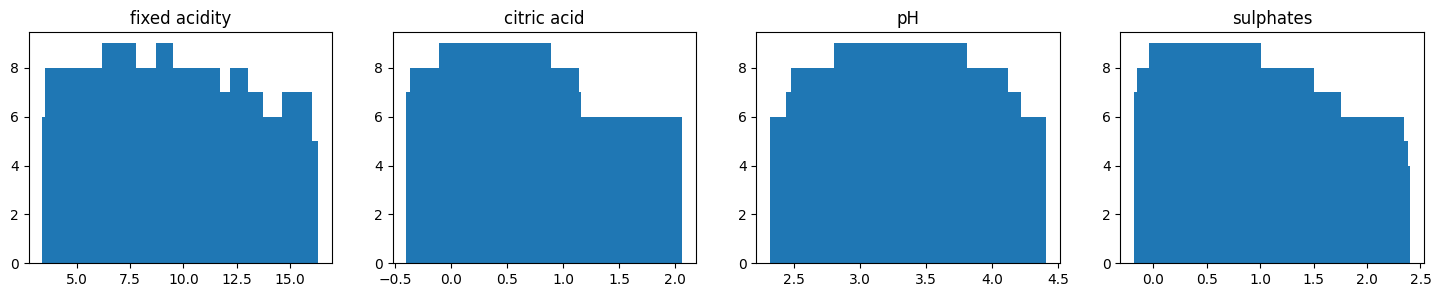

In [85]:
plt.figure(figsize=(18, 3))

plt.subplot(141)
plt.bar(wine['fixed acidity'], y)
plt.title('fixed acidity')

plt.subplot(142)
plt.bar(wine['citric acid'], y)
plt.title('citric acid')

plt.subplot(143)
plt.bar(wine['pH'], y)
plt.title('pH')

plt.subplot(144)
plt.bar(wine['sulphates'], y)
plt.title('sulphates')



plt.show()

<div style="background-color:#CFF4F3;">Візуально помітно, що alcohol і ph схожі на нормальний розподіл.
Характеристикам density і fixed acidity більш за все притаманний рівномірний розподіл.</div>

Побудуємо графіки залежності кожного прологарифмованого параметру від залежної змінної:

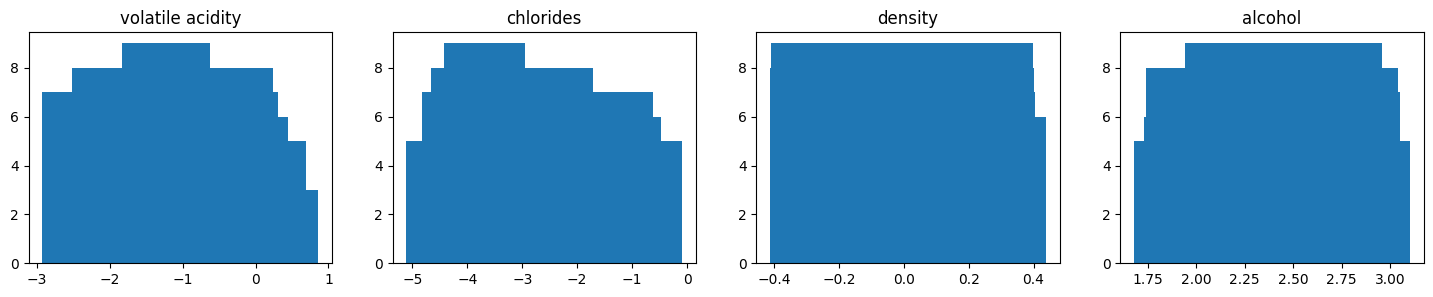

In [36]:
plt.figure(figsize=(18, 3))

plt.subplot(141)
plt.bar(np.log(wine['volatile acidity']), y)
plt.title('volatile acidity')

plt.subplot(142)
plt.bar(np.log(wine['chlorides']), y)
plt.title('chlorides')

plt.subplot(143)
plt.bar(np.log(wine['density']), y)
plt.title('density')

plt.subplot(144)
plt.bar(np.log(wine['alcohol']), y)
plt.title('alcohol')

plt.show()

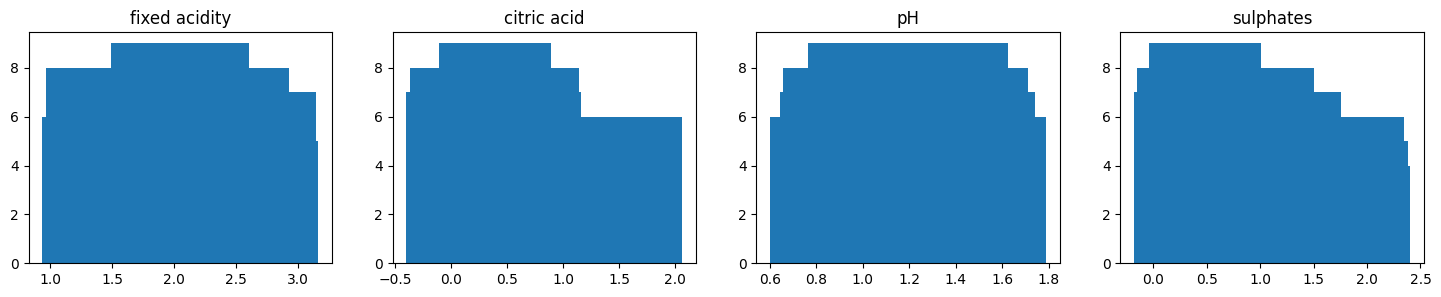

In [37]:
plt.figure(figsize=(18, 3))

plt.subplot(141)
plt.bar(np.log(wine['fixed acidity']), y)
plt.title('fixed acidity')

plt.subplot(142)
plt.bar(wine['citric acid'], y)
plt.title('citric acid')

plt.subplot(143)
plt.bar(np.log(wine['pH']), y)
plt.title('pH')

plt.subplot(144)
plt.bar(wine['sulphates'], y)
plt.title('sulphates')



plt.show()

<div style="background-color:#CFF4F3;">Візуально всі графіки параметрів після логорифмування покращились за виключенням density. citric і sulphates не логарифмували, тому що в них присутні нульові значення.</div>

### Дата-фрейм для результатів

Створимо дата-фрейм результатів, що складатиметься з різних метрик для всіх моделей, які ми побудуємо.

In [218]:
mdls = ['LogisticRegression',
    'LogisticRegressionLog',
    'LogisticRegressionKFold',
    'LogisticRegressionGrid',
    'SVC',
    'SVC KFold',
    'SVC Grid',
    'SVC Grid enhanced',
    'KMeans Grid+KFold',
    'KNeighbors KFold',
    'KNeighbors Grid',
    'DecisionTree KFold',
    'DecisionTree Grid',
    'DecisionTree enhanced',
    'RandomForest',
    'RandomForestKFold',
    'RandomForest Grid',
    'RandomForest Grid enhanced']

In [219]:
mdlresults = pd.DataFrame(
    data = {
        'Model Name': mdls,
        'Accuracy': None,
        'Precision': None,
        'Recall': None,
        'F1': None,
        'AUC': None,
        'Fault train': None, 
        'Fault test': None
    }
)

mdlresults = mdlresults.set_index('Model Name')

mdlresults

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,None,None,None,None,None,None,None
LogisticRegressionLog,None,None,None,None,None,None,None
LogisticRegressionKFold,None,None,None,None,None,None,None
LogisticRegressionGrid,None,None,None,None,None,None,None
SVC,None,None,None,None,None,None,None
SVC KFold,None,None,None,None,None,None,None
SVC Grid,None,None,None,None,None,None,None
SVC Grid enhanced,None,None,None,None,None,None,None
KMeans Grid+KFold,None,None,None,None,None,None,None


### Перевіримо на найпростіщій моделі логістичної регресії чи покращиться модель, якщо прологарифмувати дані.

Побудуємо модель логістичної регресії для даних, які ми ще не логарифмували:

In [220]:
y = wine['quality'].values
X = wine[['volatile acidity', 'chlorides', 'density', 'alcohol', 'fixed acidity', 'citric acid', 'pH', 'sulphates']]

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,  
    test_size=0.2,  
    random_state=42  
)

X_train, X_test = X_train.copy(), X_test.copy()

In [222]:
mdl = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=4000).fit(X_train, y_train)

y_pred = mdl.predict(X_test)

train_predictions = mdl.predict(X_train)
test_predictions = mdl.predict(X_test)

predictions = mdl.predict_proba(X)

In [223]:
mdlresults.at['LogisticRegression', 'Accuracy'] = accuracy_score(y_test, y_pred)
mdlresults.at['LogisticRegression', 'Precision'] = precision_score(y_test, y_pred, average='weighted')
mdlresults.at['LogisticRegression', 'Recall'] = recall_score(y_test, y_pred, average='weighted')
mdlresults.at['LogisticRegression', 'F1'] = f1_score(y_test, y_pred, average='weighted')
mdlresults.at['LogisticRegression', 'AUC'] = roc_auc_score(y, predictions, average='weighted', multi_class='ovr')
mdlresults.at['LogisticRegression', 'Fault train'] = mean_squared_error(y_train, train_predictions)
mdlresults.at['LogisticRegression', 'Fault test'] = mean_squared_error(y_test, test_predictions)
mdlresults.loc[['LogisticRegression']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077


Створимо дата-фрейм з прологарифмованих даних wine_log:

In [224]:
wine_log = pd.DataFrame(
    data = {        
    }
)

wine_log['volatile acidity'] = np.log(wine['volatile acidity'])
wine_log['chlorides'] = np.log(wine['chlorides'])
wine_log['density'] = np.log(wine['density'])
wine_log['alcohol'] = np.log(wine['alcohol'])
wine_log['fixed acidity'] = np.log(wine['fixed acidity'])
wine_log['citric acid'] = wine['citric acid']
wine_log['pH'] = np.log(wine['pH'])
wine_log['sulphates'] = wine['sulphates']

Створімо модель логістичної регресії для прологарифмованих параметрів:

In [225]:
X1 = wine_log[['volatile acidity', 'chlorides', 'density', 'alcohol', 'fixed acidity', 'citric acid', 'pH', 'sulphates']]

In [226]:
X1_train, X1_test, y_train, y_test = train_test_split(
    X1,  
    y, 
    test_size=0.2,  
    random_state=42  
)

X1_train, X1_test = X1_train.copy(), X1_test.copy()

In [227]:
mdl = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=3000).fit(X1_train, y_train)

train_predictions = mdl.predict(X1_train)
test_predictions = mdl.predict(X1_test)

y_pred = mdl.predict(X1_test)

predictions = mdl.predict_proba(X1)

In [228]:
mdlresults.at['LogisticRegressionLog', 'Accuracy'] = accuracy_score(y_test, y_pred)
mdlresults.at['LogisticRegressionLog', 'Precision'] = precision_score(y_test, y_pred, average='weighted')
mdlresults.at['LogisticRegressionLog', 'Recall'] = recall_score(y_test, y_pred, average='weighted')
mdlresults.at['LogisticRegressionLog', 'F1'] = f1_score(y_test, y_pred, average='weighted')
mdlresults.at['LogisticRegressionLog', 'AUC'] = roc_auc_score(y, predictions, average='weighted', multi_class='ovr')
mdlresults.at['LogisticRegressionLog', 'Fault train'] = mean_squared_error(y_train, train_predictions)
mdlresults.at['LogisticRegressionLog', 'Fault test'] = mean_squared_error(y_test, test_predictions)
mdlresults.loc[['LogisticRegression', 'LogisticRegressionLog']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769


<div style="background-color:#CFF4F3;">Так як метрики auc, fault train, fault test (середня помилка на навчальному та тестовому наборі) краще для прологарифмованих даних, тоді усі інші моделі будуватимемо на прологарифмованих даних.</div>

### Здійснімо крос-валідацію

In [229]:
kf = KFold(
    n_splits = 4,
    shuffle = True,
    random_state = 42
)

### Будуємо модель логістичної регресії за допомогою крос-валідації:

In [230]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = LogisticRegression(multi_class = 'ovr', max_iter=1000).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))
    
    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

print('Розмір вибірки для навчання:', len(X1_train))
print('Розмір вибірки для тестування:', len(X1_test))

Розмір вибірки для навчання: 4873
Розмір вибірки для тестування: 1624


In [231]:
mdlresults.at['LogisticRegressionKFold', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['LogisticRegressionKFold', 'Precision'] = np.mean(precision_res)
mdlresults.at['LogisticRegressionKFold', 'Recall'] = np.mean(recall_res)
mdlresults.at['LogisticRegressionKFold', 'F1'] = np.mean(f1_res)
mdlresults.at['LogisticRegressionKFold', 'AUC'] = np.mean(auc_res)
mdlresults.at['LogisticRegressionKFold', 'Fault train'] = np.mean(train_res)
mdlresults.at['LogisticRegressionKFold', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression', 'LogisticRegressionLog', 'LogisticRegressionKFold']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675


<div style="background-color:#CFF4F3;">Порівняно з логарифмованою регресією, метрики accuracy, precision, recall поліпшились. Метрики F1, auc, fault train, fault test погіршились, але вони усе одно краще, ніж відповідні метрики для непрологарифмованої логістичної регресії. </div>

### Підбір гіперпараметрів для методу логістичної регресії

In [147]:
svm = LogisticRegression()

params_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1, 2, 5, 10]
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_weighted',
    cv=4
)

clf = clf.fit(X1, y)
grid_search_results = pd.DataFrame(clf.cv_results_)

In [148]:
first = grid_search_results[(grid_search_results['rank_test_score'] == 1)]
first = first[['param_C', 'param_penalty', 'mean_test_score']]
first.insert(0, 'Models', 'LogisticRegression')
first = first.reset_index()
first.drop(['index'], axis=1, inplace=True)
first

,Models,param_C,param_penalty,mean_test_score
0,LogisticRegression,10,l2,0.419629


Побудуємо модель логістичної регресії з урахуванням параметрів регуляризації, які нам запропонувала ця сітка.

In [233]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = LogisticRegression(penalty = 'l2', C = 10, multi_class = 'ovr', max_iter=1000).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))
    
    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [234]:
mdlresults.at['LogisticRegressionGrid', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['LogisticRegressionGrid', 'Precision'] = np.mean(precision_res)
mdlresults.at['LogisticRegressionGrid', 'Recall'] = np.mean(recall_res)
mdlresults.at['LogisticRegressionGrid', 'F1'] = np.mean(f1_res)
mdlresults.at['LogisticRegressionGrid', 'AUC'] = np.mean(auc_res)
mdlresults.at['LogisticRegressionGrid', 'Fault train'] = np.mean(train_res)
mdlresults.at['LogisticRegressionGrid', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression', 'LogisticRegressionLog', 'LogisticRegressionKFold', 'LogisticRegressionGrid']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675


<div style="background-color:#CFF4F3;">Нам вдалося покращити модель, але поліпшення незначні</div>

### Метод опорних векторів

Створюємо просту модель без розбиття на тестовий та навчальний набори даних.

In [237]:
svm = SVC(
    C=1., 
    kernel='linear' 
)

svm = svm.fit(X1, y)
y_preds = svm.predict(X1)

In [239]:
mdlresults.at['SVC', 'Accuracy'] = accuracy_score(y, y_preds)
mdlresults.at['SVC', 'Precision'] = precision_score(y, y_preds, average='weighted')
mdlresults.at['SVC', 'Recall'] = recall_score(y, y_preds, average='weighted')
mdlresults.at['SVC', 'F1'] = f1_score(y, y_preds, average='weighted')
mdlresults.loc[['LogisticRegression', 'LogisticRegressionLog', 'LogisticRegressionKFold', 'LogisticRegressionGrid', 'SVC']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None


<div style="background-color:#CFF4F3;">Для простого методу опорних векторів всі метрики виявились гіршими, ніж відповідні для логістичної регресії.</div>

Побудуємо модель опорних векторів за допомогою крос-валідації

In [240]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res = [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = SVC(
    C=1., 
    kernel='linear' 
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))

In [241]:
mdlresults.at['SVC KFold', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['SVC KFold', 'Precision'] = np.mean(precision_res)
mdlresults.at['SVC KFold', 'Recall'] = np.mean(recall_res)
mdlresults.at['SVC KFold', 'F1'] = np.mean(f1_res)
mdlresults.at['SVC KFold', 'Fault train'] = np.mean(train_res)
mdlresults.at['SVC KFold', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775


<div style="background-color:#CFF4F3;">Модель дещо покращилась, порівняно без крос-валідації.</div>

### Підбір гіперпараметрів для методу опорних векторів

In [155]:
svm = SVC()

params_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.5, 1, 2, 5, 10]
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_weighted',
    cv=4
)

clf = clf.fit(X1, y)
grid_search_results = pd.DataFrame(clf.cv_results_)

In [156]:
first = grid_search_results[(grid_search_results['rank_test_score'] == 1)]
first = first[['param_C', 'param_kernel', 'mean_test_score']]
first.insert(0, 'Models', 'SVC')
first = first.reset_index()
first.drop(['index'], axis=1, inplace=True)
first

,Models,param_C,param_kernel,mean_test_score
0,SVC,10,linear,0.42205


Використаємо підібрані параметри для моделі з крос-валідацією.

In [243]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res = [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = SVC(
    C=10,
    kernel='linear' 
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))

In [244]:
mdlresults.at['SVC Grid', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['SVC Grid', 'Precision'] = np.mean(precision_res)
mdlresults.at['SVC Grid', 'Recall'] = np.mean(recall_res)
mdlresults.at['SVC Grid', 'F1'] = np.mean(f1_res)
mdlresults.at['SVC Grid', 'Fault train'] = np.mean(train_res)
mdlresults.at['SVC Grid', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685


<div style="background-color:#CFF4F3;">Після перевірки модель незначно погіршилась.</div>

Спробуємо вручну інші параметри. Замінемо значення параметра kernel з rbf на linear і C = 0.5

In [246]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res = [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = SVC(
    C=0.5, 
    kernel='linear'  
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))

In [247]:
mdlresults.at['SVC Grid enhanced', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['SVC Grid enhanced', 'Precision'] = np.mean(precision_res)
mdlresults.at['SVC Grid enhanced', 'Recall'] = np.mean(recall_res)
mdlresults.at['SVC Grid enhanced', 'F1'] = np.mean(f1_res)
mdlresults.at['SVC Grid enhanced', 'Fault train'] = np.mean(train_res)
mdlresults.at['SVC Grid enhanced', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675


<div style="background-color:#CFF4F3;">З підібраними вручну параметрами отримали найкращий результат для моделі svc. Показники приблизно такі ж самі, як і для логістичної регресії.</div>

### Метод k-середніх

In [115]:
pca = PCA(
    n_components=8 
).fit(X)
X_transform = pca.transform(X)

X = X1.to_numpy()

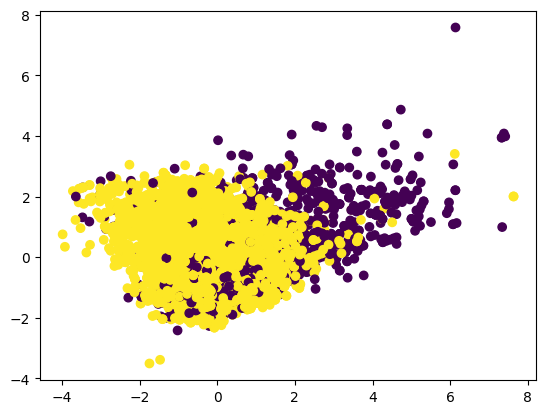

In [120]:
km = KMeans(
    n_clusters=2, 
    n_init=10, 
    random_state=42 
)

km = km.fit(X)

clusters = km.labels_

plt.scatter(X_transform[:, 0], X_transform[:, 1], c=clusters)
plt.show()

### Визначимо оптимальну кількість кластерів для даних за наступним графіком:

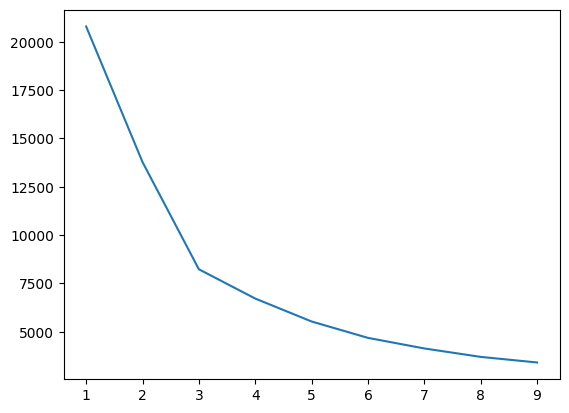

In [111]:
inertias = []
for num_clusters in range(1, 10):
    
    km = KMeans(n_clusters=num_clusters).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(range(1, 10), inertias)
plt.show()

<div style="background-color:#CFF4F3;">Оптимальна кількість кластерів за графіком є 3</div>

### Підбір гіперпараметрів для моделі KMeans:

In [113]:
svm = KMeans()

params_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 10]
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_weighted',
    cv=4
)

clf = clf.fit(X1, y)
grid_search_results = pd.DataFrame(clf.cv_results_)

In [268]:
first = grid_search_results[(grid_search_results['rank_test_score'] == 1)]
first = first[['param_n_clusters', 'mean_test_score']]
first.insert(0, 'Models', 'KMeans')
first = first.reset_index()
first.drop(['index'], axis=1, inplace=True)
first

,Models,param_n_clusters,mean_test_score
0,KMeans,7,0.151583


Побудуємо модель k-середніх за допомогою крос-валідації з поділом на 7 кластерів:

In [249]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res = [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = KMeans(
    n_clusters=7, 
    n_init=10, 
    random_state=42 
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))
    
    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    
y_pred = mdl.predict(X1_test)

In [250]:
mdlresults.at['KMeans Grid+KFold', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['KMeans Grid+KFold', 'Precision'] = np.mean(precision_res)
mdlresults.at['KMeans Grid+KFold', 'Recall'] = np.mean(recall_res)
mdlresults.at['KMeans Grid+KFold', 'F1'] = np.mean(f1_res)
mdlresults.at['KMeans Grid+KFold', 'Fault train'] = np.mean(train_res)
mdlresults.at['KMeans Grid+KFold', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Ця модель дає дуже велику помилку. Вона зовсім не підходить.</div>

### k-найближчих сусідів

In [148]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X1_train, y_train)
clf.score(X1_test, y_test)

0.5289408866995073

Побудуємо модель для k-найближчих сусідів за допомогою крос-валідації.

In [251]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = KNeighborsClassifier(n_neighbors=3).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [252]:
mdlresults.at['KNeighbors KFold', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['KNeighbors KFold', 'Precision'] = np.mean(precision_res)
mdlresults.at['KNeighbors KFold', 'Recall'] = np.mean(recall_res)
mdlresults.at['KNeighbors KFold', 'F1'] = np.mean(f1_res)
mdlresults.at['KNeighbors KFold', 'AUC'] = np.mean(auc_res)
mdlresults.at['KNeighbors KFold', 'Fault train'] = np.mean(train_res)
mdlresults.at['KNeighbors KFold', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Отримали результат приблизно такий же, як і для логістичної регресії (краще лише параметр f1 для моделі найближчих сусідів). Параметри f1 і precision краще, ніж для моделі SVC.</div>

### Підбір гіперпараметрів для моделі KNeighbors:

In [270]:
svm = KNeighborsClassifier()

params_grid = {
    'n_neighbors': list(range(1, 31))
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_weighted',
    cv=4
)

clf = clf.fit(X1, y)
grid_search_results = pd.DataFrame(clf.cv_results_)

In [271]:
first = grid_search_results[(grid_search_results['rank_test_score'] == 1)]
first = first[['param_n_neighbors', 'mean_test_score']]
first.insert(0, 'Models', 'KNeighbors')
first = first.reset_index()
first.drop(['index'], axis=1, inplace=True)
first

,Models,param_n_neighbors,mean_test_score
0,KNeighbors,29,0.428601


Побудуємо модель KNeighbors за дпомогою крос-валідації із запропонованим параметром:

In [253]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = KNeighborsClassifier(n_neighbors=29).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [254]:
mdlresults.at['KNeighbors Grid', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['KNeighbors Grid', 'Precision'] = np.mean(precision_res)
mdlresults.at['KNeighbors Grid', 'Recall'] = np.mean(recall_res)
mdlresults.at['KNeighbors Grid', 'F1'] = np.mean(f1_res)
mdlresults.at['KNeighbors Grid', 'AUC'] = np.mean(auc_res)
mdlresults.at['KNeighbors Grid', 'Fault train'] = np.mean(train_res)
mdlresults.at['KNeighbors Grid', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Результат покращився не тільки порівняно із моделю KNeighbors без підбору гіперпараметрів, але також на даний момент цей результат є найкращим серед усіх моделей.</div>

### Дерева рішень

Побудуємо модель дерева рішень з крос-валідацією.

In [256]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = DecisionTreeClassifier(max_depth=2).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [257]:
mdlresults.at['DecisionTree KFold', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['DecisionTree KFold', 'Precision'] = np.mean(precision_res)
mdlresults.at['DecisionTree KFold', 'Recall'] = np.mean(recall_res)
mdlresults.at['DecisionTree KFold', 'F1'] = np.mean(f1_res)
mdlresults.at['DecisionTree KFold', 'AUC'] = np.mean(auc_res)
mdlresults.at['DecisionTree KFold', 'Fault train'] = np.mean(train_res)
mdlresults.at['DecisionTree KFold', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Тому що ми узяли максимальну глибину тільки 2, результати вийшли погані.</div>

### Підберемо гіперпараметри

In [272]:
svm = DecisionTreeClassifier()

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(2, 100))
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_weighted',
    cv=4
)

clf = clf.fit(X1, y)
grid_search_results = pd.DataFrame(clf.cv_results_)

In [273]:
first = grid_search_results[(grid_search_results['rank_test_score'] == 1)]
first = first[['param_criterion', 'param_max_depth', 'mean_test_score']]
first.insert(0, 'Models', 'DecisionTree')
first = first.reset_index()
first.drop(['index'], axis=1, inplace=True)
first

,Models,param_criterion,param_max_depth,mean_test_score
0,DecisionTree,gini,4,0.460973


In [258]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = DecisionTreeClassifier(max_depth=4, criterion='gini').fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [259]:
mdlresults.at['DecisionTree Grid', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['DecisionTree Grid', 'Precision'] = np.mean(precision_res)
mdlresults.at['DecisionTree Grid', 'Recall'] = np.mean(recall_res)
mdlresults.at['DecisionTree Grid', 'F1'] = np.mean(f1_res)
mdlresults.at['DecisionTree Grid', 'AUC'] = np.mean(auc_res)
mdlresults.at['DecisionTree Grid', 'Fault train'] = np.mean(train_res)
mdlresults.at['DecisionTree Grid', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold',
                'DecisionTree Grid']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Результати помітно покращились, але це досі незадовільний результат.</div>

Спробуємо підібрати параметри вручну:

max_depth=4, criterion='gini'
Accuracy:  0.54
F1:  0.505
Precision:  0.4975
Recall:  0.54
Auc:  0.7024999999999999
Очікувана помилка на навчальному наборі: 0.63 +- 0.0
Очікувана помилка на тестовому наборі: 0.6475 +- 0.010897247358851694

Але я автоматичному підбору гіперпараметрів не повірив, зробив підбір вручну деяких парамтерів:

max_depth=8, criterion='gini'
Accuracy:  0.535
F1:  0.5175000000000001
Precision:  0.515
Recall:  0.535
Auc:  0.7075
Очікувана помилка на навчальному наборі: 0.53 +- 0.025495097567963948
Очікувана помилка на тестовому наборі: 0.6950000000000001 +- 0.011180339887498923

max_depth=4, criterion='entropy'
Accuracy:  0.54
F1:  0.495
Precision:  0.505
Recall:  0.54
Auc:  0.71
Очікувана помилка на навчальному наборі: 0.645 +- 0.011180339887498959
Очікувана помилка на тестовому наборі: 0.655 +- 0.0050000000000000044

max_depth=8, criterion='entropy'
Accuracy:  0.55
F1:  0.535
Precision:  0.535
Recall:  0.55
Auc:  0.7175
Очікувана помилка на навчальному наборі: 0.525 +- 0.008660254037844395
Очікувана помилка на тестовому наборі: 0.6725000000000001 +- 0.012990381056766554

Побудуємо модель з максимальною глибиною, що дорівнює 8 і крітерієм "entropy". В спробах брати максимальну глибину, більшу ніж 8, метрики тільки погіршувалися. 

In [260]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = DecisionTreeClassifier(max_depth=8, criterion='entropy').fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [261]:
mdlresults.at['DecisionTree enhanced', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['DecisionTree enhanced', 'Precision'] = np.mean(precision_res)
mdlresults.at['DecisionTree enhanced', 'Recall'] = np.mean(recall_res)
mdlresults.at['DecisionTree enhanced', 'F1'] = np.mean(f1_res)
mdlresults.at['DecisionTree enhanced', 'AUC'] = np.mean(auc_res)
mdlresults.at['DecisionTree enhanced', 'Fault train'] = np.mean(train_res)
mdlresults.at['DecisionTree enhanced', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold',
                'DecisionTree Grid',
                'DecisionTree enhanced']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Результати метрик покращились відносно моделі з автоматично підібраними параметрами, але вона не стала найкращою.</div>

### Випадковий ліс

Побудуємо просту модель рандомного лісу. 

In [262]:
mdl = RandomForestClassifier(
    n_estimators = 80, 
    criterion='gini', 
    max_depth=3, 
    min_samples_split=10,
    min_samples_leaf=5, 
    max_features=0.8,
    bootstrap=True, 
    max_samples=0.8,
    random_state=42 
)

mdl = mdl.fit(X1_train, y_train)  

y_pred = mdl.predict(X1_test)

train_predictions = mdl.predict(X1_train)
test_predictions = mdl.predict(X1_test)

predictions = mdl.predict_proba(X1)

In [264]:
mdlresults.at['RandomForest', 'Accuracy'] = accuracy_score(y_test, y_pred)
mdlresults.at['RandomForest', 'Precision'] = precision_score(y_test, y_pred, average='weighted')
mdlresults.at['RandomForest', 'Recall'] = recall_score(y_test, y_pred, average='weighted')
mdlresults.at['RandomForest', 'F1'] = f1_score(y_test, y_pred, average='weighted')
mdlresults.at['RandomForest', 'AUC'] = roc_auc_score(y, predictions, average='weighted', multi_class='ovr')
mdlresults.at['RandomForest', 'Fault train'] = mean_squared_error(y_train, train_predictions)
mdlresults.at['RandomForest', 'Fault test'] = mean_squared_error(y_test, test_predictions)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold',
                'DecisionTree Grid',
                'DecisionTree enhanced',
                'RandomForest']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Ми отримали найкращий результат серед усіх попередніх моделей, але він не надто хороший.</div>

Побудуємо модель випадкового лісу за допомогою крос-валідації. За початкові параметри візьмемо критерій "gini" і максимальну глибину "4".

In [265]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = RandomForestClassifier(
    n_estimators = 80,
    criterion='gini',
    max_depth=4, 
    min_samples_split=10, 
    min_samples_leaf=5,
    max_features=0.8, 
    bootstrap=True, 
    max_samples=0.8, 
    random_state=42
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [266]:
mdlresults.at['RandomForestKFold', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['RandomForestKFold', 'Precision'] = np.mean(precision_res)
mdlresults.at['RandomForestKFold', 'Recall'] = np.mean(recall_res)
mdlresults.at['RandomForestKFold', 'F1'] = np.mean(f1_res)
mdlresults.at['RandomForestKFold', 'AUC'] = np.mean(auc_res)
mdlresults.at['RandomForestKFold', 'Fault train'] = np.mean(train_res)
mdlresults.at['RandomForestKFold', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold',
                'DecisionTree Grid',
                'DecisionTree enhanced',
                'RandomForest',
                'RandomForestKFold']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Параметри f1 і auc незначно покращилися.</div>

### Здійснімо підбір гіперпараметрів:

In [274]:
svm = RandomForestClassifier()

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 7, 8, 13, 20, 25]
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_weighted',
    cv=4
)

clf = clf.fit(X1, y)
grid_search_results = pd.DataFrame(clf.cv_results_)

In [275]:
first = grid_search_results[(grid_search_results['rank_test_score'] == 1)]
first = first[['param_criterion', 'param_max_depth', 'mean_test_score']]
first.insert(0, 'Models', 'DecisionTree')
first = first.reset_index()
first.drop(['index'], axis=1, inplace=True)
first

,Models,param_criterion,param_max_depth,mean_test_score
0,DecisionTree,entropy,6,0.433834


In [267]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = RandomForestClassifier(
    n_estimators = 80,
    criterion='entropy',
    max_depth=6, 
    min_samples_split=10, 
    min_samples_leaf=5,
    max_features=0.8, 
    bootstrap=True, 
    max_samples=0.8, 
    random_state=42
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [268]:
mdlresults.at['RandomForest Grid', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['RandomForest Grid', 'Precision'] = np.mean(precision_res)
mdlresults.at['RandomForest Grid', 'Recall'] = np.mean(recall_res)
mdlresults.at['RandomForest Grid', 'F1'] = np.mean(f1_res)
mdlresults.at['RandomForest Grid', 'AUC'] = np.mean(auc_res)
mdlresults.at['RandomForest Grid', 'Fault train'] = np.mean(train_res)
mdlresults.at['RandomForest Grid', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold',
                'DecisionTree Grid',
                'DecisionTree enhanced',
                'RandomForest',
                'RandomForestKFold',
                'RandomForest Grid']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Модель покращилась, але результати все ще незадовільні.</div>

Спробуємо перевірити вручну деякі параметри:

max_depth=4, criterion='gini'
Accuracy:  0.545
F1:  0.5075000000000001
Precision:  0.5125
Recall:  0.545
Auc:  0.7250000000000001

max_depth=6, criterion='entropy'
Accuracy:  0.5625
F1:  0.5275000000000001
Precision:  0.5425
Recall:  0.5625
Auc:  0.75

max_depth=10, criterion='entropy'
Accuracy:  0.605
F1:  0.5825
Precision:  0.6074999999999999
Recall:  0.605
Auc:  0.7925

max_depth=20, criterion='entropy'
Accuracy:  0.63
F1:  0.605
Precision:  0.635
Recall:  0.63
Auc:  0.8125

Побудуємо модель випадкового лісу з параметрами максимальної глибини "20" і крітерієм "entropy". В спробах збільшити максимальну глибини більше, ніж на 20 призвело до погіршення результатів.

In [269]:
train_res, test_res, accuracy_res, f1_res, precision_res, recall_res, auc_res = [], [], [], [], [], [], []

for train_idx, test_idx in kf.split(X1, y):
    X1_train, y_train = X1.iloc[train_idx], y[train_idx]
    X1_test, y_test = X1.iloc[test_idx], y[test_idx]

    mdl = RandomForestClassifier(
    n_estimators = 80,
    criterion='entropy',
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=5,
    max_features=0.8, 
    bootstrap=True, 
    max_samples=0.8, 
    random_state=42
).fit(X1_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X1_train), mdl.predict(X1_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

    accuracy_res.append(np.round(accuracy_score(y_test, y_test_preds), 2))
    f1_res.append(np.round(f1_score(y_test, y_test_preds, average='weighted'), 2))
    precision_res.append(np.round(precision_score(y_test, y_test_preds, average='weighted'), 2))
    recall_res.append(np.round(recall_score(y_test, y_test_preds, average='weighted'), 2))
    predictions = mdl.predict_proba(X1_test)
    auc_res.append(np.round(roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr'), 2))

In [270]:
mdlresults.at['RandomForest Grid enhanced', 'Accuracy'] = np.mean(accuracy_res)
mdlresults.at['RandomForest Grid enhanced', 'Precision'] = np.mean(precision_res)
mdlresults.at['RandomForest Grid enhanced', 'Recall'] = np.mean(recall_res)
mdlresults.at['RandomForest Grid enhanced', 'F1'] = np.mean(f1_res)
mdlresults.at['RandomForest Grid enhanced', 'AUC'] = np.mean(auc_res)
mdlresults.at['RandomForest Grid enhanced', 'Fault train'] = np.mean(train_res)
mdlresults.at['RandomForest Grid enhanced', 'Fault test'] = np.mean(test_res)
mdlresults.loc[['LogisticRegression',
                'LogisticRegressionLog',
                'LogisticRegressionKFold',
                'LogisticRegressionGrid',
                'SVC',
                'SVC KFold',
                'SVC Grid',
                'SVC Grid enhanced',
                'KMeans Grid+KFold',
                'KNeighbors KFold',
                'KNeighbors Grid',
                'DecisionTree KFold',
                'DecisionTree Grid',
                'DecisionTree enhanced',
                'RandomForest',
                'RandomForestKFold',
                'RandomForest Grid',
                'RandomForest Grid enhanced']]

,Accuracy,Precision,Recall,F1,AUC,Fault train,Fault test
Model Name,,,,,,,
LogisticRegression,0.532308,0.494832,0.532308,0.495588,0.706876,0.679623,0.653077
LogisticRegressionLog,0.527692,0.48762,0.527692,0.486219,0.711559,0.660189,0.650769
LogisticRegressionKFold,0.53,0.4975,0.53,0.4725,0.7075,0.6675,0.6675
LogisticRegressionGrid,0.5275,0.5,0.5275,0.4775,0.71,0.665,0.6675
SVC,0.527166,0.40713,0.527166,0.457409,None,None,None
SVC KFold,0.5275,0.4075,0.5275,0.46,None,0.6775,0.6775
SVC Grid,0.5275,0.405,0.5275,0.4575,None,0.6825,0.685
SVC Grid enhanced,0.53,0.4125,0.53,0.46,None,0.6775,0.675
KMeans Grid+KFold,0.0675,0.3075,0.0675,0.0975,None,14.8875,14.9425


<div style="background-color:#CFF4F3;">Результати значно покращились. Це найкращий результат з усіх попередніх моделей.</div>

### Висновок

Розглядались набори даних, пов'язані з червоним і білим португальськими винами. 

Було проведено аналіз атрибутів і визначено їх тип.
Для визначення типу атрибутів визначалась кількість унікальних значень для кожного з них. Виявилося, що тільки "quality" є категорним. 

Дослідили зв'язки між параметрами та залежною змінною. 
Для цього обчислювались коефіцієнти кореляції. Виявилося, що чотири параметри (volatile acidity, chlorides, density, alcohol) мають значну залежність. На основі цих даних, обрано параметри, що увійшли до подальшого аналізу. 

Проведено попередню обробку даних (візуалізація даних, перевірка на пропущені значення, на нечислові значення і прологарифмовані дані)
У вхідному дата-фреймі пропущених і нечислових значень не виявлено.

Було побудовано графіки залежності кожного параметру від залежної змінної. Візуально було помітно, що alcohol і ph схожі на нормальний розподіл. Характеристикам density і fixed acidity більш за все притаманний рівномірний розподіл.

Прологарифмували всі параметри, крім density, citric і sulphates (тому що в них присутні нульові значення). Побудували графіки залежності кожного отриманого параметру від залежної змінної. Візуально всі графіки параметрів покращилися. 
На найпростіщій моделі логістичної регресії перевірили чи покращиться модель з прологарифмованими даними. Такі метрики, як auc, середня помилка на навчальному та тестовому наборі покращилися. Тому всі моделі будуватимемо на прологарифмованих даних.

Розглядались наступні моделі: логістична регресія, метод опорних векторів, к-середнє, к-найближчих сусідів, дерева рішень і випадковий ліс.
Для покращення моделей використовувались крос-валідація для навчання та оцінки моделей і підбір гіперпараметрів.

Для покращення моделі побудували логістичну регресію з адопомогою крос-валідації. Порівняно з логарифмованою регресією, метрики accuracy, precision, recall поліпшились. Метрики F1, auc, fault train, fault test погіршились, але вони усе одно краще, ніж відповідні метрики для непрологарифмованої логістичної регресії.
Автоматично здійснили підбір гіперпараметрів для методу логістичної регресії. Побудували модель з урахуванням запропонованих параметрів. Покращити модель вдалося, але поліпшення виявилися незначними.
Побудували просту модель без розбиття на тестовий та навчальний набори за методом опорних векторів. Для цього методу всі метрики виявились гіршими, ніж відповідні для логістичної регресії.

Побудували модель опорних векторів за допомогою крос-валідації. Модель дещо покращилась, порівняно без крос-валідації.
Автоматично здійснили підбір гіперпараметрів для методу опорних векторів. Побудували модель з урахуванням запропонованих параметрів. Після перевірки модель незначно погіршилась. 
Спробували вручну інші параметри. Покращили модель опорних векторів. Отримали показники приблизно такі ж самі, як і для логістичної регресії.

Побудували просту модель методом k-середніх. Графічно виявили оптимальну кілкість кластерів.
Здійснили підбір гіперпараметрів для методу k-середніх. Побудували модель за допомогою крос-валідації і з урахуванням запропонованих параметрів. Отримали дуже погані результати. 

Побудували модель k-найближчих сусідів за допомогою крос-валідації. Отримали результат приблизно такий же, як і для логістичної регресії (краще лише параметр f1 для моделі найближчих сусідів). Параметри f1 і precision краще, ніж для моделі SVC.
Автоматично знійснили підбір гіперпараметрів для методу k-найближчих сусідів. Результат покращився не тільки порівняно із моделю KNeighbors без підбору гіперпараметрів, але також був найкращим серед усіх моделей.

Побудували модель дерева рішень за допомогою крос-валідації. Тому що ми узяли максимальну глибину тільки 2, результати вийшли погані. 
Автоматично здійснили підбір гіперпараметрів для дерев рішень. Результати помітно покращились, але отримали досі незадовільний результат.
Спробували підібрати параметри вручну. Результати метрик покращились відносно моделі з автоматично підібраними параметрами, але вона не стала найкращою.

Побудували модель випадкового лісу. Отримали найкращий результат серед усіх попередніх моделей, але він був ще не надто хороший.
Побудували модель випадковго лісу за допомогою крос-валідації. За параметрами f1 і auc модель незначно покращилася.
Автоматично здійснили підбір гіперпараметрів для випадкового лісу. Модель покращилась, але результати все ще були незадовільні.
Підібрали деякі параметри за допомогою яких результати значно покращились. Отримали найкращий результат з усіх попередніх моделей.

Найкраща модель виявилась моделю випадкового лісу.